# Bloom Filters - Isaac Schaal

## Overview

A bloom filter is a data structure similar to a hashtable. However, it is specialized for specific uses. The key advantage is that it is memory efficient. The drawback is that it only stores if an item is in the filter, and not the item itself. This is achieved by creating a bit array (array of 0s and 1s). A Bloom filter has a set length ($m$) of boolean values, or a bit array, and a number of hash functions ($k$) that are optimized based on the number of items desired to be stored ($n$) in the filter and a False Positive Rate ($p$). It supports two operations, insert and search. There is a small probability of a false positive (that an item is in the filter when it is not) and no probabiliy of a false negative.

### Supported Operations

#### Insert

The first and most basic operation in a bloom filter is insert. To insert, a key is run through all $k$ hash funtions to produce a digest (output, one of the indeces in the bit_array) , and the ```bit_array[digest]``` is set to 1. In order to ensure that the hash functions output a digest within the range of the bit_array, the mod function can be used.

It is also important to note that multiple keys can hash to the same value for different (or the same) hash functions. What will not happen is different keys hashing to the all of the same digests for all hash functions. 

This operation is very fast, as it happens in O(k) time. However, the optimal k is usually a small integer, and more importantly, for a given instantiation of a bloom filter k will be constant, and thus in reality is bounded in O(1) time. 

#### Search

The search operation follows easily from insert. In order to check if a given key is in the filter, the key is hashed through all $k$ hash functions and the bit_array is checked at all indexes. If the bit in the bit_array at any of the digests is 0, the key is not in the filter, and ```False``` is returned. If all bits are 1, it is probable that the key is in the filter, and ```True``` is returned. However, with a probability $p$, there is a chance that there is a false positive. This would occur when a give key has not been inserted, but all $k$ of the digests that would be created by hashing the key have been set to 1 by other keys. A false negative is not possible, as if a key has been inserted, all bits will be set to 1.

This operation is also very fast, as it has the same constant speed as insert.

#### Delete is not possible

In a standard Bloom Filter, the delete operation is impossible. The reason for this is that if a key were to be deleted, all of its $k$ bits would need to be set to 0. However, other keys would have some or all of those $k$ bits as one of their bits, and if ```search()``` were called on that key, it would return false, as some of their bits were turned to 0. This breaks the functionality of the Bloom Filter, and thus is not supported.

### Usefulness 

#### Advantages and Disadvantages

The main advantage of the Bloom filter is the low memory that is needed. We can define $b$, the number of bits per key, as ${\frac {m}{n}}$ . This value $b$ is usually quite low, it could for example by 8. Compared to a hash table, which might need to store quite large keys, the filter is much more memory efficient. If there is a situation where memory is important and s small rate of false positives is acceptable, a Bloom filter functions very well.

It is important to note that a Bloom filter maintains the fast speed of insert and search, (just like a hash table) and thus retains all of the advantages that come from this. 

The lack of delete and the absense of the keys are the main disadvantages to this data structure, and must be kept in mind when deciding to use a Bloom Filter.

#### Use Case

An example use case would be a list of forbidden passwords. If a service wants users to create strong passwords, they could create a Bloom Filter of passwords that are too common, simple, or easy to guess. The user could be creating a password and when she attemps to use a given password, it is searched for in the Bloom filter. If it is a strong password, it will not be in the filter and be allowed to be used. There will be a small probability that a strong password is rejected due to a false positive, but the only affects of this is that they user will have to enter a different password (a minor inconveniance).

If memory was an issue, the Bloom filter would solve this problem with the same speed but much lower memory usage than a standard hash table.


## Technical Breakdown

We will now begin a technical analysis of the Bloom filter, to understand how the number of hash functions $k$, the false positive rate $p$, the number of items to be stored $n$, and the number of bits used $m$ relate. We will start by examining the false positive rate.

We assume that our hash function chooses each array position with equal probability. The probability that a certain bit will be selected is ${\frac {1}{m}}$. Thus, the probability that it is not selected is $1-{\frac {1}{m}}$. We know that there are $k$ hash functions, and thus the probability that a bit is not set to $1$ by any of the hash functions is

$$\left(1-{\frac {1}{m}}\right)^{k} $$

If we insert $n$ elements, the probability that a specific bit is still 0 is 

$$\left(1-{\frac {1}{m}}\right)^{kn} $$

and thus the probability that the bit is 1 is 

$$1 -\left(1-{\frac {1}{m}}\right)^{kn} $$

We can then apply the exponential limit to get 

$$1 -\left(1-{\frac {1}{m}}\right)^{kn}\approx 1-e^{\frac {-kn}{m}} $$

In order for there to be a false positive, all $k$ bits selected by the hash functions during the search procedure must be 1. Thus, the probability of a false positive ($p$) is then given by 

$$\mathit{p} = \left(1-e^{\frac {-kn}{m}}\right)^{k}$$

This gives us the relation between $p$ and our other variables. We can examine this equation to see how $m$ and $n$ impact $p$. As $m$ increases, $p$ tends to zero. This makes sense, as the more bits we are using to store each item, the lower chance we will have of a false positive. As $n$ increases, $p$ approaches 1, which again makes sense, as the more items we are trying to store in the same array size, the more likely a false positive is. Thus, we see $p$ scaling according to the ratio of $n$ to $m$. We can also look at the scaling of $k$. This is more complicated as there are multiple effects. As $k$ increases, there are more bits that must be 1 to have a false positive, but as $k$ increases, there are also more bits that have been made to be 1 by inserting. There should be thus be a value of k that balances for these two effects and creates the lowest $p$.

From this analysis, its clear that there is not a set number of hash functions or number of bits used to store each value. Our question becomes, given how many values will be stored $n$ and the desired false positive rate $p$, we want to create a filter that optimzes storage. To do this we must first find our optimal value of $k$ in relation to $m$ and $n$. This can be done by taking the derivative with respect to *k* of our above equation for $p$. This is not trivial, but we use the following steps to do so. We first let 

$$p = e^g$$

and it follows that 

$$ g= k\ln\left(1-e^{\frac {-kn}{m}}\right)$$

Minimizing $ e^g$ will minimize $p$, and minimizing $g$ will minimize $ e^g$. We must then find the $k$ that minimizes $g$. This is done by calculating the derivative of $g$ with  respect to $k$.

$$ \frac {dg}{dk} =\ln\left({1-e^{\frac {-kn}{m}}}\right) + {\frac {kn}{m}} {\frac {e^{\frac {-kn}{m}}}{1-e^{\frac {-kn}{m}}}} $$

An extrema occurs when we set $\frac {dg}{dk} = 0$ which gives us

$$ k = \ln{2}{\frac{m}{n}} $$

We know that this extrema is a minimum because $\frac {dg}{dk} < 0$ to the left and  $\frac {dg}{dk} > 0$ to the right.

We now have our optimal $k$ value for a given number of bits $m$ and number of elements $n$. We already know $n$, but we don't yet know the required number of bits $m$. To find this, we can substitute our optimal value of $k$ into our equation for $p$.

$$\mathit{p} = \left(1-e^{-\frac {\ln{2}{n\frac{m}{n}}}{m}}\right)^{\ln{2}{\frac{m}{n}}}$$

which simplifies to

$$\ln{p} = -{\frac{m}{n}}{\left(\ln{2}\right)}^{2}$$

which gives us the final result 

$$ m = - {\frac{n\ln{p}}{\left(\ln{2}\right)^{2}}}$$

These equations can be used in order to create an optimal Bloom filter based on the input of $p$ and $n$.

## Implementation

I implemented this using the bitarray module in python, to create an array of boolean values. I created a BloomFilter class that takes as inputs the number ```n``` of items expected to be stored in the list and the desired false positive rate ```fp_rate```. From this, ```k``` and ```m``` are optimized and a BloomFilter object is created.

### Hashing 

In making the BloomFilter, we must also choose a hashing function, or in this case several hash functions. In our implemenatation, depending on the desired size and false positive rate, we will need to have a diffent number of hash functions. Thus, it is best to choose a 'family' of hash functions from which k (the desired number) can be created.

We know that our hash function should be both indipendent and uniformally distributed. We also note that there is no need to make the hash difficult to reverse, as we don't care if anyone interacting with it can reverse the hash, as their is no added value, and thus we don't need a crytopgraphiclally secure hash function.

An indipendent hash function means that the same key will hash to the same key independently of where any other key has been hashed too. A uniformally distributed hash function ensures that each key is equally likely to be hashed to any of the ```m``` slots in a hash table. This may not be exactly true in practice but may be close enough to function as if were.

A professional level hash function will have these attributes, and possibly more. Soley these attributes are sufficient for our uses, so I chose ```MurmurHash```. It is quite fast, and also quite collision resistant. Murmer hash also has enough functions, set by a seed, to have variable k numbers of hash functions. 

MurmurHash works by using a combination of Multiplication, Rotate and XOR along with specifically created constants in order to create a fast and secure hash function. It is used in many professional settings and suffices for our uses. 

Note that we are also making an assumption about the input data, being that it won't be specifically designed to create collissions. It has been shown that MurmerHash is vulnerable to these sorts of attacks. (https://emboss.github.io/blog/2012/12/14/breaking-murmur-hash-flooding-dos-reloaded/)
However, this is not important for many use cases, like a spell checker or anti-virus, and thus we can continue with MurmerHash.

### Code

In [60]:
import math
import mmh3
from bitarray import bitarray


class BloomFilter(object):
    
    """Class for a bloom filter..."""
    
    def __init__(self, n, fp_rate):
        '''
        n : int
            Number of items to be stored in the filter
        fp_rate : float
            False Positive probability, in decimal
        '''
        
        self.fp_rate = fp_rate
        
        #Use the 'get_size' attribute (below) to get the
        #size of the bit array to be used
        self.size = self.get_size(n, fp_rate)
        
        #Use the bit array size previously calculated 
        # and the number of items to get the number
        # of hash functions, k
        self.k = self.get_hash_count(self.size, n)
        
        #Create an all 0 bit_array
        self.bit_array = bitarray(self.size)
        self.bit_array.setall(0)
        
        #The current number of items stored in the Filter
        self.items = 0
    
    def add(self, item):
        '''
        item to be added to the filter
        Note that the item is not itself stored, 
        but instead the k bits that the k hash functions
        hash item to are set to 1
        '''
        
        self.items +=1
        for i in range(self.k):
            # create digest (output) for a given item
            # and set the bitarray to true at that location
            # for all k hash functions
            digest = mmh3.hash(item,i) % self.size            
            self.bit_array[digest] = True 
        
     
    
    def check(self, item):
        '''
        Check for item in the filter, by looking at all
        bits that should be True (from add) and if any are 
        False, then its not present. This can have a false
        positive, (not returning False when it should) due
        to the nature of Bloom Filters
        '''
        for i in range(self.k):
            digest = mmh3.hash(item,i) % self.size
            # If any bit is false, return false
            if self.bit_array[digest] == False:
                return False
        # Else return true (all bits are true, probability
        # 1-fp_rate that it exists)
        return True
    
    
    @staticmethod
    def get_size(n, fp_rate):
        '''
        Return the optimal sized bit array (m),
        given:
        n : int
            number of items to be stored
        fp_rate: float
            False positive rate in decimal
        and using the formula:
        m = -(n * lg(fp_rate)) / (lg(2)^2)
        '''
        
        m = -(n * math.log(fp_rate)) / (math.log(2)**2)
        # The output must be an integer, and it chooses the lower side
        # (floor) of the m
        return int(m)
    
    @staticmethod
    def get_hash_count(m,n):
        '''
        Return the number of hash functions (k) to be used,
        given:
            m: int
                size of bit array
            n : int
                number of items to be stored
        and using the formula:
            k = (m/n) * lg(2)
        '''
        
        k = (m/n) * math.log(2)
        # The output must be an integer, and it chooses the lower side
        # (floor) of the k
        return int(k)     

### Experimental Confirmation

The below code is used to test the false positive rate of our Bloom filter. A specific instance is made with expected number of values (n) = 1000 and false positive rate (p) = 0.05. Then, strings are added to the filter and at each step (after 1 string is added) both the expected and real error rate are calculated. 

In [80]:
import random
from random import shuffle
import math
import string
 
n = 1000 #no of items to add
p = 0.05 #false positive probability
 
bloomf = BloomFilter(n,p)
print("Size of bit array (m):", bloomf.size)
print("False Positive Probability (fp_rate):", bloomf.fp_rate)
print("Number of hash functions (k):", bloomf.k)

def rand_word(ln = 10):
    '''
    Creates a random string of characters
    '''
    return ''.join([random.choice(string.ascii_letters) for n in
range(ln)])

def expected_error_rate(bloomf):
    '''
    Calculates the expected error of a given bloom filter
    at a given state (a given number of items inserted)
    '''
    return (1-(math.e**(- bloomf.k*bloomf.items/bloomf.size)))**bloomf.k


def fp_test(bloomf):
    '''
    Calculates the error rate, by testing 1000 random words,
    all that return True are false positives.
    '''
    test_strings = [rand_word() for _ in range(1000)]
    fp_counter = 0
    for test in test_strings:
        if bloomf.check(test):
            fp_counter +=1
    return fp_counter / 1000

expected_array=[]
actual_array = []
for i in range (10000):
    bloomf.add(rand_word())
    expected_array.append(expected_error_rate(bloomf))
    actual_array.append(fp_test(bloomf))

Size of bit array (m): 6235
False Positive Probability (fp_rate): 0.05
Number of hash functions (k): 4


The figure below shows the expected error vs actual error as the number of items increases from 0 to ```n```, the capacity of the Bloom filter.

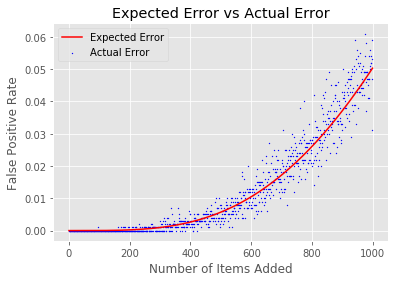

In [86]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.plot(expected_array[:1000], c = 'red', label = 'Expected Error') 
plt.scatter(list(range(1000)),actual_array[:1000], s = 0.7,c = 'blue' , label = 'Actual Error')
plt.title('Expected Error vs Actual Error')
plt.xlabel('Number of Items Added')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

It can be seen that the actual error closely follows the expected error, with some additional variance. We should also check this when the number of items has increased past capacity. This is done in the following figure.

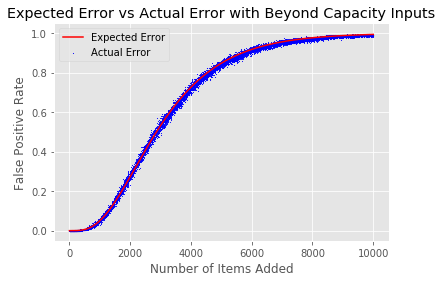

In [89]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.plot(expected_array, c = 'red', label = 'Expected Error') 
plt.scatter(list(range(10000)),actual_array, s = 0.3,c = 'blue' , label = 'Actual Error')
plt.title('Expected Error vs Actual Error with Beyond Capacity Inputs')
plt.xlabel('Number of Items Added')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

As can be seen, the actual error rate closely follows the expected error rate, which is to be expected. It is also worth mentioning that the error rate approaches 1 as the number of items vastly exceedes capacity. This makes sense, as more and more of the array is filled with 1s because of the many items, and at the point when all boolean values are 1, the false positive rate will be 1, as every possible item will return true as all bits are 1.

### Scaling Behaviour 

We will now examine how two key aspects, access time and memory usage scale as we increase our two inputs, being false positive rate and items stored.

Access time is equivalent to ```k```, the number of hash functions, as this is how many checks our operation must go through to determine if an item is in the filter. Memory usage is equivalent to ```m```, the number of bits in our array. It is important to note that for any given instance of our Bloom filter, access time and memory usage will remain constant, as the bit array is the same size and the number of hash functions is the same. Thus, when concerned with scaling, we are concerned with scaling as we change our inputs.

For memory usage, we have the equation 

$$ m = - {\frac{n\ln{p}}{\left(\ln{2}\right)^{2}}}$$

It is important to note that $\ln{p}$ is negative. Thus as $n$ increases, $m$ increases linearly. This makes intuitive sense. The more items we want to store in filter, the larger our filter must be. We can also look more closely into the $\ln{p}$ term. When scaling in $p$, we want to see how $m$ changes as $p$ gets very small. The $\ln$ functions decreases as its input gets close to zero. Thus, $m$ will exponentially increase as our error rate gets smaller. This again makes sense. With very small error rates, we have already made the array very large to acheive that. To get it even smaller, we must make the array even bigger (by more than before) in order to make it even smaller. 

For access time, we have the equation

$$ k = \ln{2}{\frac{m}{n}} $$

Substituting in our previous equation for $m$, we get 

$$ k = {\frac{-\ln{p}}{\ln{2}}} $$

The first thing that we notice is that the $n$ term is nowhere in the relationship. Thus, as $n$ increases or decreases, $k$ stays the same. This is because our $k$ is chosen based on the error rate we want, and the same number of hash functions can equally well function on a large or small amount of numbers.

We also see that as our $p$ approaches 0, our access time increases exponenitally (the same reason of having a $-\ln$ as before). This again makes sense, as to get the very low error rate, we must increase our $k$ by more and more in order to get the decrease in error rate. This shows, along with our above analysis, that at a certain point, decreasing the error rate becomes to expensive compared to the access time and memory usage. However, with our Bloom filter, if we can stand having a small but non-zero error rate, we can have a very reasonable access time and memory usage, which was the goal of our filter.